# 🎨 K-Means Clustering for Image Compression

This notebook demonstrates how K-Means Clustering — an unsupervised ML algorithm — can compress images by reducing the number of distinct colors, while preserving visual quality.

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1. Implementing

I will implement the two phases of the K-means algorithm separately in the next sections.

- I will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.


Exercise 1:
`find_closest_centroid`

In [3]:
def find_closest_centroids(x, centroids):
    k = centroids.shape[0]

    idx = np.zeros(x.shape[0], dtype=int)
    for i in range(x.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(x[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

In [4]:
def load_data():
    np.random.seed(42)
    x = np.random.rand(300, 2) * 10
    return x

In [5]:
# now let's implement using an example data
x = load_data()


In [6]:
print("First five elements of x are: \n", x[:5])
print("The shape of x is: ", x.shape)

First five elements of x are: 
 [[3.74540119 9.50714306]
 [7.31993942 5.98658484]
 [1.5601864  1.5599452 ]
 [0.58083612 8.66176146]
 [6.01115012 7.08072578]]
The shape of x is:  (300, 2)


In [7]:
# select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# find closest centroids using initial centroids
idx = find_closest_centroids(x, initial_centroids)

# so closest centroids for the first three elements
print("First three elements in idx are: ", idx[:3])


First three elements in idx are:  [2 2 0]


Exercise 2:
<br>


`compute_centroids`

- recomputing the values for each centroid

In [8]:
def compute_centroid(x, idx, k):
    m, n = x.shape

    centroids = np.zeros((k, n))

    for k in range(k):
        points =  x[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

let's check the implementation

In [9]:
k = 3
centroids = compute_centroid(x, idx, k)

print("The centroids are: ", centroids)


The centroids are:  [[2.05581538 4.83551076]
 [6.47063869 1.70611726]
 [7.59692144 6.76507558]]


K-means on sample dataset 

now this code will use the above two in loop to calculate the centroids for each iteration till that no change condition isn't there

In [10]:
def run_kMeans(x, initial_centroids, max_iters = 10):
    # m is the no. of rows , n is the no. of columns of co-ordinates length as 2 due to 2-D rep. as (x, y)
    
    m, n = x.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # running the k-Means
    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(x, centroids)

        centroids = compute_centroid(x, idx, k)

        print("Here is the centroid for this iteration: ", centroids )

    return centroids, idx
    




now let's check: 
<br>
**Note**: Initial values for centoids are given manually

In [11]:
x = load_data()

initial_centroids = np.array([[3,3], [6, 2], [8, 5]])
k = 3

max_iters = 20

centroids, idx = run_kMeans(x, initial_centroids, max_iters)

K-Means iteration 0/19
Here is the centroid for this iteration:  [[2.05581538 4.83551076]
 [6.47063869 1.70611726]
 [7.59692144 6.76507558]]
K-Means iteration 1/19
Here is the centroid for this iteration:  [[1.84974653 5.36523334]
 [6.24844963 1.94445748]
 [7.53543827 7.21699882]]
K-Means iteration 2/19
Here is the centroid for this iteration:  [[1.76413934 5.70626248]
 [5.98227845 2.03153051]
 [7.50190337 7.37571773]]
K-Means iteration 3/19
Here is the centroid for this iteration:  [[1.78458568 5.93287687]
 [5.81959301 2.0752057 ]
 [7.62683373 7.37930887]]
K-Means iteration 4/19
Here is the centroid for this iteration:  [[1.78375312 6.18076072]
 [5.4849239  2.00664939]
 [7.6775802  7.27112984]]
K-Means iteration 5/19
Here is the centroid for this iteration:  [[1.85814849 6.50952179]
 [5.20270318 1.96035504]
 [7.72816189 7.21585193]]
K-Means iteration 6/19
Here is the centroid for this iteration:  [[1.95971978 6.84272269]
 [4.92918877 1.94007221]
 [7.84137711 7.06373246]]
K-Means itera

3. Random initialization:

<br>

to select random examples from the training set.


In [12]:
def kMeans_init_centroids(x, k):

    randidx = np.random.permutation(x.shape[0])

    centroids = x[randidx[:k]]
    # print(centroids)

    return centroids
kMeans_init_centroids(x, 3)

array([[4.08952944, 1.7329432 ],
       [4.50544135, 1.29159415],
       [4.92618094, 3.2875161 ]])

4. Image compression with K-means
<br>

so we are reducing the 1000s of colors to 16 colors

so we would only need to store the index of the color at that location

Shape of original_img is:  (128, 128, 3)
[0.6862745  0.4862745  0.19607843]


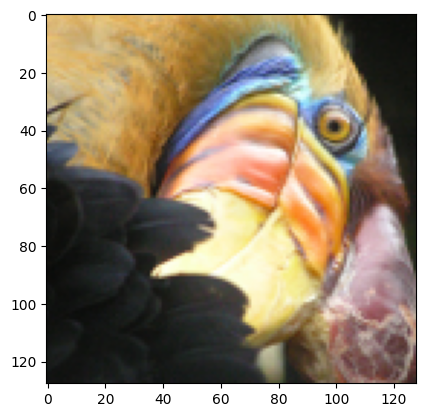

In [ ]:
# Dataset
# Load image
img_path = 'D:/Andrew ng ML/bird_small.png'
original_img = plt.imread(img_path) # so stored as numpy array of shape (height, width, 3)

# visualize the image
plt.imshow(original_img)

print('Shape of original_img is: ', original_img.shape)
print(original_img[50, 33], " so it is of PNG type.")


Processing Data 

so changing the matrix `original_img` into a two-dimensional matrix

In [16]:
# so that all values are in the range 0-1
original_img = original_img/255

x_img = np.reshape(original_img, (original_img.shape[0]* original_img.shape[1], 3))


4.2 K-Means on image pixels

In [17]:
# k = 16 (to get the 16 colors or centroids)
k = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(x_img, k)

centroids, idx = run_kMeans(x_img, initial_centroids, max_iters)


K-Means iteration 0/9
Here is the centroid for this iteration:  [[0.00045417 0.00048407 0.00044527]
 [0.00227242 0.00194877 0.0016274 ]
 [0.00052036 0.00057186 0.00055148]
 [0.00147659 0.00144793 0.00165682]
 [0.0003123  0.0003309  0.00028363]
 [0.00356321 0.00335052 0.00288013]
 [0.00155968 0.00112818 0.00076412]
 [0.00060402 0.00066341 0.00071233]
 [0.00085925 0.00080648 0.0007775 ]
 [0.00067994 0.00064955 0.00058167]
 [0.0002433  0.0002706  0.00023287]
 [0.00036495 0.00039488 0.00035425]
 [0.00098949 0.00101274 0.00113077]
 [0.00257367 0.00178096 0.00073509]
 [0.00323963 0.00260167 0.00167227]
 [0.00064948 0.00073424 0.0007591 ]]
K-Means iteration 1/9
Here is the centroid for this iteration:  [[0.00045124 0.00048401 0.00044452]
 [0.00230127 0.00202051 0.00183251]
 [0.00052539 0.00056777 0.00054531]
 [0.00154435 0.00153084 0.00176835]
 [0.00030624 0.0003317  0.00028886]
 [0.00359084 0.00338402 0.00291532]
 [0.00166835 0.00121153 0.00081644]
 [0.00060619 0.00065603 0.0006812 ]
 [0.000

In [22]:
print("Shape of idx: ", idx.shape)
print("Closest centroid of some random list of elements: ", idx[123:324])

Shape of idx:  (16384,)
Closest centroid of some random list of elements:  [10 10 10 10 10 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 13 14 13 13 14 14 13 13
 14 14 14 14 14 13  6  9  2  2  0 11 11  4  4 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13]


4.3 Compress the image

- assigning each pixel position to its closest centroid using the  `find_closest_centroids` function

In [46]:
# print(centroids.shape)
# print(idx)
print(centroids.shape)
# print(centroids)

x_recovered = centroids[idx, :]

# print(x_recovered)
# print(x_recovered.shape)
# print(original_img.shape)
x_recovered = np.reshape(x_recovered, original_img.shape)


(16, 3)


## 🔍 Before vs After Compression

Below we visualize the **original image vs. the compressed image (using K = 16 colors)**.

K-Means clusters similar pixel values and replaces each pixel with its nearest cluster center, effectively reducing the number of unique colors.

---

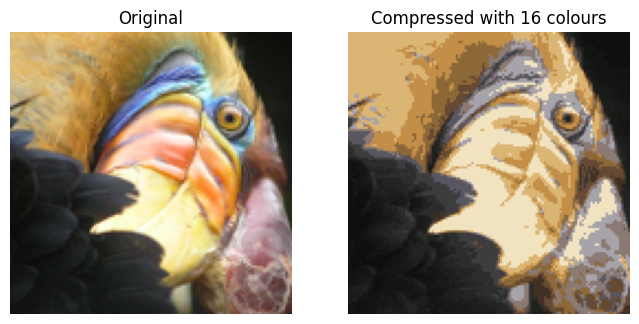

In [47]:
# original image
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

# display the compressed image
ax[1].imshow(x_recovered*255)
ax[1].set_title('Compressed with %d colours' %k)
ax[1].set_axis_off()

## 🧠 Summary

- We reduced the number of colors from thousands to just **K = 16** using K-Means.
- Image size drops, and most visual information is retained.
- This is a powerful real-world application of unsupervised learning!
